<a href="https://colab.research.google.com/github/hasanj0n/Data_Science/blob/main/05_ml_05_amaliyot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Imgur](https://i.imgur.com/5pXzCIu.png)

# Data Science va Sun'iy Intellekt Praktikum

## 5-MODUL. Machine Learning

### Portfolio uchun vazifa: Toshkent shahrida uylarning narxini aniqlash.

Ushbu amaliyotda sizning vazifangiz berilgan ma`lumotlar asosida Toshkent shahridagi uylarning narxini aniqlash.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_data_08-02-2021.csv')
df.head()

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000


# Ustunlar ta'rifi
- `location` - sotilayotgan uy manzili
- `district` - uy joylashgan tuman
- `rooms` - xonalar soni
- `size` - uy maydoni (kv.m)
- `level` - uy joylashgan qavat
- `max_levels` - ja'mi qavatlar soni
- `price` - uy narxi

## Vazifani CRSIP-DM Metolodgiyasi yordamida bajaring.
<img src="https://i.imgur.com/dzZnnYi.png" alt="CRISP-DM" width="800"/>

Narxlarni qaysi pul birligida ekanligini berilmagan , shuning uchun $ deb olib ketamiz.

In [ ]:
df.shape

(7565, 7)

In [ ]:
df.district.value_counts()

Чиланзарский         1641
Мирзо-Улугбекский    1382
Юнусабадский          883
Учтепинский           880
Мирабадский           773
Яккасарайский         658
Яшнободский           484
Шайхантахурский       396
Олмазорский           269
Сергелийский          175
Янгихаётский           16
Бектемирский            8
Name: district, dtype: int64

Narxlar ichida **Договорная** nomli ustunlar mavjud ekan. Ularni nan bilan almashtirib tashlab yuboramiz bu ustunlarni



In [ ]:
df.replace('Договорная', np.NaN, inplace=True)
df.replace('Площадьземли:1сот', 10, inplace=True)

In [ ]:
df=df.dropna()

In [ ]:
df["price_int"]=df.price.astype("int64")

In [ ]:
df["size_int"]= df["size"].astype("float32")

Yangi ustunlarga narxlar va maydonini int ga o'zgartirib qo'shib qo'yamiz


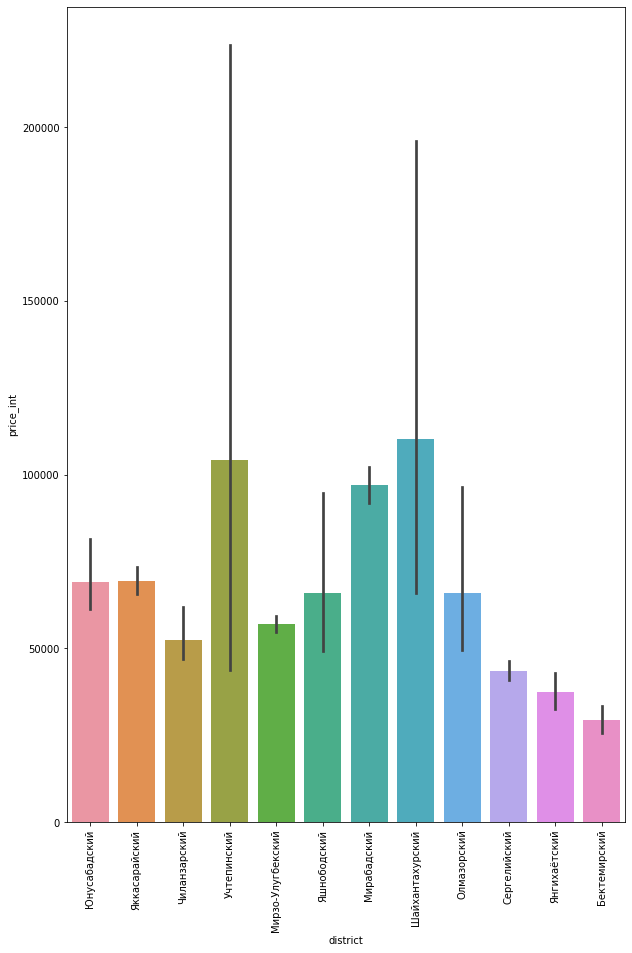

In [ ]:
plt.figure(figsize=(10,15))
sns.barplot(data=df, x="district", y="price_int")
plt.xticks(rotation=90)
plt.show()

Garfikdan ko'rishimiz mumkinki eng qimmat uylar Uchtepa va shayhontoxur tumanlarida. Eng arzon uylar Bektimir tumanida.

In [ ]:
df.shape

(7466, 9)

Biz bir nechta ustunlar tushib qoldi. Va bizda ma'lumotlar ko'pligi sababli model yaratishda yetadi.

In [ ]:
df.isna().sum()

location      0
district      0
rooms         0
size          0
level         0
max_levels    0
price         0
price_int     0
size_int      0
dtype: int64

Bizda hech qanday Nan qiymatlar qolmadi

In [ ]:
df.drop("price",axis=1, inplace=True)
df.drop("size",axis=1, inplace=True)

endi **price, size** ustuni bizga kerak emas

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7436 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    7436 non-null   object 
 1   district    7436 non-null   object 
 2   rooms       7436 non-null   int64  
 3   level       7436 non-null   int64  
 4   max_levels  7436 non-null   int64  
 5   price_int   7436 non-null   int64  
 6   size_int    7436 non-null   float32
dtypes: float32(1), int64(4), object(2)
memory usage: 435.7+ KB


Malumotlar ichida noodatiy ma'lumotlar bor ekan.
Masalan: Uylar asosan eng kichik uylar maydoni 20 m kv bo'ladi yoki eng katta uylar asosan 400 atrofida bo'ladi

In [ ]:
df=df[~(df.size_int>2000)]

In [ ]:
df=df[~(df.size_int<17)]

In [ ]:
df.describe()

,rooms,level,max_levels,price_int,size_int
count,7436.000000,7436.000000,7436.000000,7.436000e+03,7436.000000
mean,2.622109,3.698225,6.030393,7.140603e+04,73.317490
std,1.078501,2.238227,2.606627,6.418023e+05,37.529743
min,1.000000,1.000000,1.000000,2.000000e+00,17.000000
25%,2.000000,2.000000,4.000000,3.500000e+04,50.000000
50%,3.000000,3.000000,5.000000,4.650000e+04,65.650002
75%,3.000000,5.000000,9.000000,6.700000e+04,85.000000
max,10.000000,19.000000,25.000000,5.200000e+07,500.000000


In [ ]:
df.corr()

,rooms,level,max_levels,price_int,size_int
rooms,1.000000,0.137011,0.182062,0.055940,0.784453
level,0.137011,1.000000,0.593147,-0.003484,0.154704
max_levels,0.182062,0.593147,1.000000,0.011233,0.267065
price_int,0.055940,-0.003484,0.011233,1.000000,0.059728
size_int,0.784453,0.154704,0.267065,0.059728,1.000000


Narx va boshqa ustunlar bilan bog'liqlik darajasi past ekan

In [ ]:
df.corrwith(df.price_int)

rooms         0.055940
level        -0.003484
max_levels    0.011233
price_int     1.000000
size_int      0.059728
dtype: float64

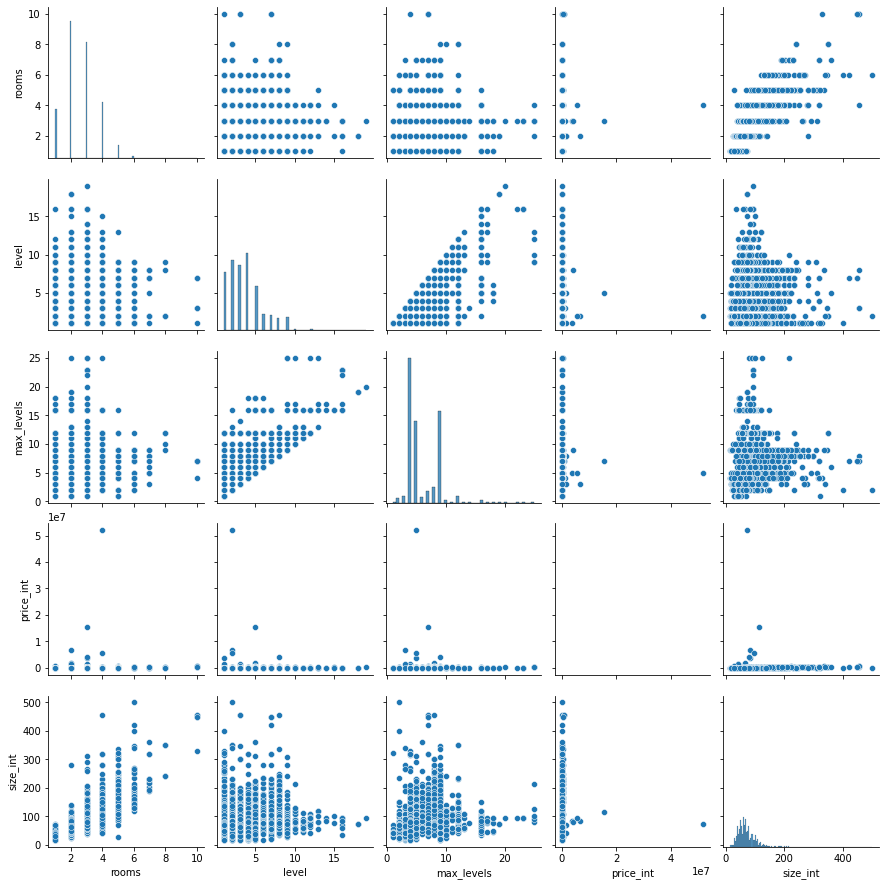

In [ ]:
sns.pairplot(df)
plt.show()

Bizga location ustuni kerak emas.(I think)

In [ ]:
df.drop("location", axis=1, inplace=True)

In [ ]:
df.sample(5)

,district,rooms,level,max_levels,price_int,size_int
4907,Мирзо-Улугбекский,2,1,4,31000,50.0
7244,Мирабадский,3,6,9,59000,75.0
6440,Учтепинский,3,4,9,47500,65.0
2375,Мирабадский,3,7,16,63000,76.0
2478,Мирзо-Улугбекский,1,1,4,29000,33.0


# Machine Learning

In [ ]:
import sklearn

Malumotlarni train va testlar ga ajratib olamiz. (test 20%)

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)
# test_set
# train_set

,district,rooms,level,max_levels,price_int,size_int
6177,Яшнободский,2,5,5,23500,50.0
3615,Юнусабадский,2,4,4,37000,58.0
1072,Яшнободский,5,8,8,139999,203.0
636,Чиланзарский,2,3,4,41500,52.0
7168,Учтепинский,2,2,9,35000,54.0
...,...,...,...,...,...,...
5282,Яшнободский,2,5,5,29000,46.0
5317,Чиланзарский,3,5,9,68000,80.0
5483,Юнусабадский,2,2,3,32000,50.0
875,Мирзо-Улугбекский,3,4,4,52000,70.0


In [ ]:
train = train_set.copy()

In [ ]:
train_cat = pd.get_dummies(train.district)
train_cat

,Бектемирский,Мирабадский,Мирзо-Улугбекский,Олмазорский,Сергелийский,Учтепинский,Чиланзарский,Шайхантахурский,Юнусабадский,Яккасарайский,Янгихаётский,Яшнободский
6177,0,0,0,0,0,0,0,0,0,0,0,1
3615,0,0,0,0,0,0,0,0,1,0,0,0
1072,0,0,0,0,0,0,0,0,0,0,0,1
636,0,0,0,0,0,0,1,0,0,0,0,0
7168,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5282,0,0,0,0,0,0,0,0,0,0,0,1
5317,0,0,0,0,0,0,1,0,0,0,0,0
5483,0,0,0,0,0,0,0,0,1,0,0,0
875,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
test_cat = pd.get_dummies(test_set.district)
test_cat

,Бектемирский,Мирабадский,Мирзо-Улугбекский,Олмазорский,Сергелийский,Учтепинский,Чиланзарский,Шайхантахурский,Юнусабадский,Яккасарайский,Янгихаётский,Яшнободский
635,0,0,0,0,0,0,1,0,0,0,0,0
4606,0,0,0,0,0,0,0,0,1,0,0,0
101,0,0,0,0,0,0,1,0,0,0,0,0
2526,0,0,1,0,0,0,0,0,0,0,0,0
2051,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3336,0,1,0,0,0,0,0,0,0,0,0,0
1627,0,0,0,0,0,0,0,0,1,0,0,0
5364,0,0,0,0,0,0,0,1,0,0,0,0
2238,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
train_num = train.drop("district", axis=1)

In [ ]:
test_num = test_set.drop("district", axis=1)

In [ ]:
train_y = train_num.price_int.copy()
train_num = train_num.drop("price_int", axis=1)

In [ ]:
test_y = test_num.price_int.copy()
test_num = test_num.drop("price_int", axis=1)

In [ ]:
train_y

6177     23500
3615     37000
1072    139999
636      41500
7168     35000
         ...  
5282     29000
5317     68000
5483     32000
875      52000
7395     15500
Name: price_int, Length: 5948, dtype: int64

In [ ]:
test_y

635      44200
4606     63000
101      41500
2526     54000
2051     78000
         ...  
3336     95000
1627    135000
5364     35000
2238     42000
3680     20500
Name: price_int, Length: 1488, dtype: int64

In [ ]:
test_num

,rooms,level,max_levels,size_int
635,2,3,4,50.0
4606,2,1,9,83.0
101,2,2,5,48.0
2526,3,2,5,69.0
2051,4,4,4,88.0
...,...,...,...,...
3336,4,8,9,100.0
1627,4,1,8,117.0
5364,2,2,4,60.0
2238,2,2,4,60.0


In [ ]:
train_x_df= pd.concat([train_num, train_cat], axis=1)
train_x_df

,rooms,level,max_levels,size_int,Бектемирский,Мирабадский,Мирзо-Улугбекский,Олмазорский,Сергелийский,Учтепинский,Чиланзарский,Шайхантахурский,Юнусабадский,Яккасарайский,Янгихаётский,Яшнободский
6177,2,5,5,50.0,0,0,0,0,0,0,0,0,0,0,0,1
3615,2,4,4,58.0,0,0,0,0,0,0,0,0,1,0,0,0
1072,5,8,8,203.0,0,0,0,0,0,0,0,0,0,0,0,1
636,2,3,4,52.0,0,0,0,0,0,0,1,0,0,0,0,0
7168,2,2,9,54.0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5282,2,5,5,46.0,0,0,0,0,0,0,0,0,0,0,0,1
5317,3,5,9,80.0,0,0,0,0,0,0,1,0,0,0,0,0
5483,2,2,3,50.0,0,0,0,0,0,0,0,0,1,0,0,0
875,3,4,4,70.0,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
test_x_df= pd.concat([test_num, test_cat], axis=1)
test_x_df

,rooms,level,max_levels,size_int,Бектемирский,Мирабадский,Мирзо-Улугбекский,Олмазорский,Сергелийский,Учтепинский,Чиланзарский,Шайхантахурский,Юнусабадский,Яккасарайский,Янгихаётский,Яшнободский
635,2,3,4,50.0,0,0,0,0,0,0,1,0,0,0,0,0
4606,2,1,9,83.0,0,0,0,0,0,0,0,0,1,0,0,0
101,2,2,5,48.0,0,0,0,0,0,0,1,0,0,0,0,0
2526,3,2,5,69.0,0,0,1,0,0,0,0,0,0,0,0,0
2051,4,4,4,88.0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3336,4,8,9,100.0,0,1,0,0,0,0,0,0,0,0,0,0
1627,4,1,8,117.0,0,0,0,0,0,0,0,0,1,0,0,0
5364,2,2,4,60.0,0,0,0,0,0,0,0,1,0,0,0,0
2238,2,2,4,60.0,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
train_x =min_max_scaler.fit_transform(train_x_df)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
test_x =min_max_scaler.fit_transform(test_x_df)

In [ ]:
train_x

array([[0.11111111, 0.22222222, 0.16666667, ..., 0.        , 0.        ,
        1.        ],
       [0.11111111, 0.16666667, 0.125     , ..., 0.        , 0.        ,
        0.        ],
       [0.44444444, 0.38888889, 0.29166667, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.11111111, 0.05555556, 0.08333333, ..., 0.        , 0.        ,
        0.        ],
       [0.22222222, 0.16666667, 0.125     , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.33333333, 0.33333333, ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
test_x

array([[0.11111111, 0.11764706, 0.13636364, ..., 0.        , 0.        ,
        0.        ],
       [0.11111111, 0.        , 0.36363636, ..., 0.        , 0.        ,
        0.        ],
       [0.11111111, 0.05882353, 0.18181818, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.11111111, 0.05882353, 0.13636364, ..., 0.        , 0.        ,
        0.        ],
       [0.11111111, 0.05882353, 0.13636364, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.11764706, 0.13636364, ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
test_y

635      44200
4606     63000
101      41500
2526     54000
2051     78000
         ...  
3336     95000
1627    135000
5364     35000
2238     42000
3680     20500
Name: price_int, Length: 1488, dtype: int64

In [ ]:
train_y

6177     23500
3615     37000
1072    139999
636      41500
7168     35000
         ...  
5282     29000
5317     68000
5483     32000
875      52000
7395     15500
Name: price_int, Length: 5948, dtype: int64

## Linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()

In [ ]:
lr_model.fit(train_x,train_y)

LinearRegression()

In [ ]:
predict_data = lr_model.predict(test_x)
predict_data = predict_data.astype(np.int64)
pd.DataFrame({"Prognoz":predict_data,"Real_data":test_y})

,Prognoz,Real_data
635,35467,44200
4606,74227,63000
101,41717,41500
2526,67206,54000
2051,79755,78000
...,...,...
3336,88861,95000
1627,124066,135000
5364,91270,35000
2238,45690,42000


In [ ]:
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(test_y,predict_data)
lin_rmse= np.sqrt(lin_mse)
print(lin_rmse)

183942.0356479028


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_model = DecisionTreeRegressor()
tree_model.fit(train_x,train_y)

DecisionTreeRegressor()

In [ ]:
predicted_data_tree = tree_model.predict(test_x)
predicted_data_tree = predicted_data_tree.astype(np.int64)
pd.DataFrame({"Prognoz":predicted_data_tree,"Real_data":test_y})

,Prognoz,Real_data
635,36125,44200
4606,33998,63000
101,32950,41500
2526,49500,54000
2051,53250,78000
...,...,...
3336,63000,95000
1627,52000,135000
5364,47733,35000
2238,37750,42000


In [ ]:
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(test_y,predicted_data_tree)
lin_rmse= np.sqrt(lin_mse)
print(lin_rmse)

1471256.5094652872


In [ ]:
from sklearn.ensemble import RandomForestRegressor
fr_model = RandomForestRegressor()
fr_model.fit(train_x,train_y)

RandomForestRegressor()

In [ ]:
predicted_data_fr = fr_model.predict(test_x)
predicted_data_fr = predicted_data_fr.astype(np.int64)
pd.DataFrame({"Prognoz":predicted_data_fr,"Real_data":test_y})

,Prognoz,Real_data
635,36519,44200
4606,57051,63000
101,37716,41500
2526,48067,54000
2051,60711,78000
...,...,...
3336,82025,95000
1627,91262,135000
5364,42129,35000
2238,37896,42000


In [ ]:
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(test_y,predicted_data_fr)
lin_rmse= np.sqrt(lin_mse)
print(lin_rmse)

965873.6880765692


## Modelni saqlash

In [ ]:
import joblib
filename= "lr_model.jbl"
joblib.dump(lr_model,filename)



['lr_model.jbl']

In [ ]:
model=joblib.load("lr_model.jbl")